# Matplotlib Examples

## 1. Setup

### 1.1 Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

### 1.2 Data

In [2]:
x = np.linspace(0,2,51)
y = np.sin(np.pi*x)

## 2. Basic Plots

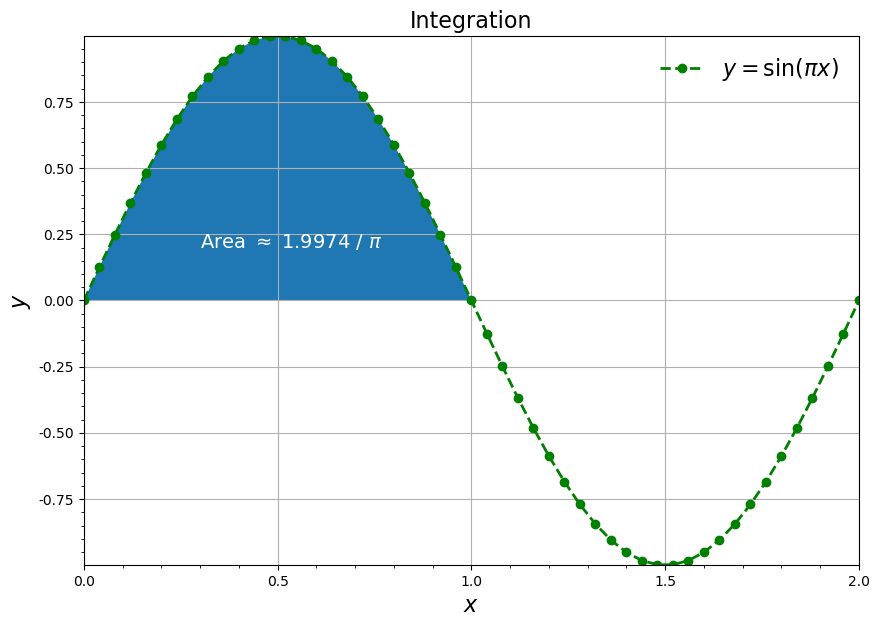

In [3]:
def basic_plot(ax, x, y, title, label, fs=16):
    lines = ax.plot(x, y, c='g', marker='o', lw=2, linestyle='--',
                    label=label)
    ax.grid(True)
    ax.set_title(title, fontsize=fs)
    ax.set_xlabel('$x$', fontsize=fs,color='black')
    ax.set_ylabel('$y$', fontsize=fs,color='black')
    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())
    ax.legend(loc=1, frameon=False, fontsize=fs)
    
    # Format axes
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_locator(MultipleLocator(0.25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    return fig, ax


def area_under_curve(x,y):
    n = x.shape[0]
    n = (n-1)//2+1
    area = np.trapz(y[:n], dx=x[1])
    return area.item()


def draw_area_under_curve(ax, x, y, fs=14):
    area = area_under_curve(x, y)
    ax.annotate(r"Area $\approx$ %.4f / $\pi$" % (area*np.pi),
                xy=(0.3,0.2), fontsize=fs, color='white')
    ax.fill_between(x, y, 0.0, where=y>0.0, interpolate=True)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7),
                       dpi=100, facecolor='w', edgecolor='k')

basic_plot(ax, x, y, title='Integration',
           label='$y = \sin(\pi x)$')
draw_area_under_curve(ax, x, y)
fig.savefig('sin_x.png', figsize=(10,7), dpi=300)